<a href="https://colab.research.google.com/github/richards-okiemute/richards-okiemute/blob/main/Bellabeat_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Bellabeat Data Analysis**
### by Richards Okiemute
richards.okiemute@gmail.com

---



# **Introduction Bellabeat**









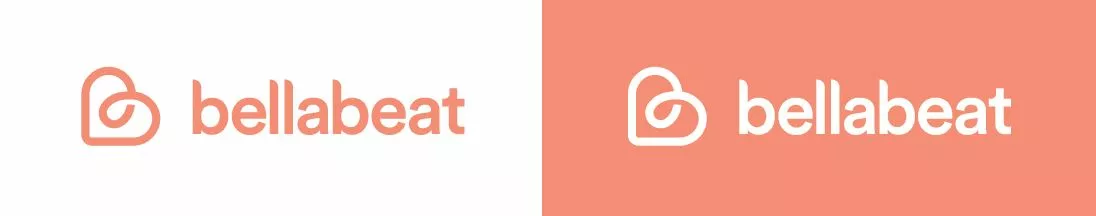


Welcome to the Bellabeat data analysis case study! Bellabeat is a successful small company, and they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights generated/discovered will then help guide marketing strategy for the company.

# About The Company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.


By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

# **Business Questions**
Sršen asks me to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants me to select one Bellabeat product to apply these insights to in my presentation.

Questions to answer via analysis:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# **Deliverables:**
A clear summary of the business task

A description of all data sources used

Documentation of any cleaning or manipulation of data

A summary of analysis

Supporting visualizations and key findings

High-level content recommendations based on the analysis

# **Key Stakeholders:**
**Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer

**Sando Mur:** Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team

Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.

# **Data Preparation**

The data for this analysis is the FitBit Fitness Tracker Data recommended by Sršen.

[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.

In [1]:
#importing necessary libraries for data importation and analysis

import numpy as np                     #for numerical computation
import pandas as pd                    #for data manipulation
import plotly.graph_objects as go      #for data visualization
import matplotlib.pyplot as plt        #for data visualization
import matplotlib.patches as patch     #to patch custom legends
import seaborn as sns                  #for data visualization
import matplotlib.style as pltstyle
pltstyle.use('ggplot')
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set1')
sns.set_context('paper')
plt.rcParams["figure.figsize"] = (14, 8)
import warnings
warnings.filterwarnings("ignore")    #Ignore Warnings


In [2]:
#importing data from google drive
dailyActivity = pd.read_csv('/content/drive/MyDrive/My Datasets/Bellabeats/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleepDay = pd.read_csv('/content/drive/MyDrive/My Datasets/Bellabeats/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weightLogInfo = pd.read_csv('/content/drive/MyDrive/My Datasets/Bellabeats/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

Viewing first 5 rows of each table

In [3]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


# **EXPLORATORY DATA ANALYSIS (EDA)**

Exploratoray data anlysis will be carried out on the individual datsets to check for missing values and data inconsistencies in order to fix these problems (if they exists).

## **EDA on `dailyactivity` dataset**

Exploring the features in the `dailiyActivity` table.

In [6]:
dailyActivity.columns #checking the column names

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [7]:
dailyActivity.info() #checking the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

**Observation**

There are 940 records in the dataset and the data types include 7 floats and 7 integers, and 1 object (ActivityDate).

ActivityDate is supported to be a date type.
ActivityDate will be converted to date.

There are no null values in the dataset

In [8]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'], format="%m/%d/%Y") #converting ActivityDate to datetime object and in Year-Month-Day format

In [9]:
dailyActivity.info() #checking the dataset information to ensure successful TotalSteps type conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

ActivityDate is now in datetime format

In [10]:
dailyActivity['ActivityDate'].head() #viewing first five columns of the converted column

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

The converted ActivityDate is in the desired format

In [11]:
dailyActivity.isnull().sum() #checking for missing values

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

There are no missing values in the dataset

In [12]:
dailyActivity[dailyActivity.duplicated()==True].value_counts() #checking the values count of the duplicated data points if any.

Series([], dtype: int64)

There are no duplicated values in the dataset

In [13]:
dailyActivity['Id'].nunique() #checking for the number of unique users

33

There are 33 unique Ids in the dataset

**Descriptive Statistics of the `dailyActivity` dataset**

---



In [14]:
round(dailyActivity.describe(),3) #descriptive statistics

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000,940.000,940.000,940.000,940.000,940.000,940.000,940.000,940.000,940.000,940.000,940.000,940.000
mean,4.855407e+09,7637.911,5.490,5.475,0.108,1.503,0.568,3.341,0.002,21.165,13.565,192.813,991.211,2303.610
std,2.424805e+09,5087.151,3.925,3.907,0.620,2.659,0.884,2.041,0.007,32.845,19.987,109.175,301.267,718.167
min,1.503960e+09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.320127e+09,3789.750,2.620,2.620,0.000,0.000,0.000,1.945,0.000,0.000,0.000,127.000,729.750,1828.500
50%,4.445115e+09,7405.500,5.245,5.245,0.000,0.210,0.240,3.365,0.000,4.000,6.000,199.000,1057.500,2134.000
75%,6.962181e+09,10727.000,7.712,7.710,0.000,2.052,0.800,4.783,0.000,32.000,19.000,264.000,1229.500,2793.250
max,8.877689e+09,36019.000,28.030,28.030,4.942,21.920,6.480,10.710,0.110,210.000,143.000,518.000,1440.000,4900.000


## **EDA on `sleepDay` dataset**

In [15]:
sleepDay.info() #Checking the information about the SleepDay dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


**Observation**

There are no null data points and there is one object data type `sleepDay` which should be in date type format.

SleepDay will be converted to a date type format.

The remaining features are in integer format.

In [16]:
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay']) #converting SleepDay to datetime object
sleepDay['day_of_week'] = sleepDay['SleepDay'].dt.day_name() #Extracting the day of the week from the SleepDay

In [17]:
sleepDay.info() #Checking the information about the SleepDay dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   day_of_week         413 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.5+ KB


In [18]:
sleepDay['SleepDay'].head()

0   2016-04-12
1   2016-04-13
2   2016-04-15
3   2016-04-16
4   2016-04-17
Name: SleepDay, dtype: datetime64[ns]

In [19]:
sleepDay.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
day_of_week           0
dtype: int64

There are no missing value in the `sleepDay` dataset

In [20]:
sleepDay['Id'].nunique()

24

There are 24 unique users in the `sleepDay` dataset

**Descriptive Statistics of the `sleepDay` dataset**

---



In [21]:
round(sleepDay.describe(),3)

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000,413.000,413.000
mean,5.000979e+09,1.119,419.467,458.639
std,2.060360e+09,0.346,118.345,127.102
min,1.503960e+09,1.000,58.000,61.000
25%,3.977334e+09,1.000,361.000,403.000
50%,4.702922e+09,1.000,433.000,463.000
75%,6.962181e+09,1.000,490.000,526.000
max,8.792010e+09,3.000,796.000,961.000


**Interpretations of Descriptive Statistics of Important Attributes**

The table above contains the summary sttistics for the `sleepDay` dataset.

**TotalMinutesAsleep:** The users spent an average sleeping time of about 7 hours asleep. The minumimum and maximum time spent sleeping are 58 minutes and 796 minutes (about 13 hours) respectiely.

**TotalTimeInBed:** The users spent a maximumof over 16 hours in bed, a minimum of 1 hour, and an average of about 8 hours in bed.

The huge standard deviation in both attribute could indicate the presence of outliers in the dataset

In [22]:
sleepDay['TotalHoursInBed'] = round(sleepDay['TotalTimeInBed']/60,1)

## **EDA on `weightLogInfo` dataset**

In [23]:
weightLogInfo.info() #checking the information of the weightLogInfo dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


**Observations**

The  dataset contains 8 columns which have 4 floats, 2 integers, 1 boolean, and 1 object (Date) which wrong recorded. The Date column will be converted to a datetime data type.

The `Fat` column contains 2 non-null records. This will be investigated.

In [24]:
weightLogInfo['Date'] = pd.to_datetime(weightLogInfo['Date']) #converting Date to datetime object

In [25]:
weightLogInfo['Fat'].unique()

array([22., nan, 25.])

In [26]:
weightLogInfo['Fat'].value_counts()

25.0    1
22.0    1
Name: Fat, dtype: int64

In [27]:
weightLogInfo['Fat'].isnull().sum()

65

In [28]:
weightLogInfo['Fat'].shape

(67,)

**Observations**

There are 3 unique values in the `Fat` column which are `[22., nan, 25.]`.

The column contains only one instance of 25.0 and 22.0 while the rest are nan.

The column also contains 65 missing data points out of 67 total records.

This column does not hold any real and important information hence will be dropped.

LogId is just an identifier as Id. It does not carry any otheruseful information thus it will also be dropped.

In [29]:
weightLogInfo.drop(['Fat','LogId'], axis = 1, inplace = True) #dropping the Fat and LogId columns from the weightLogInfo dataset

**Descriptive Statistics of the `weightLogInfo` dataset**

---


In [30]:
round(weightLogInfo.describe(),3)

,Id,WeightKg,WeightPounds,BMI
count,6.700000e+01,67.000,67.000,67.000
mean,7.009282e+09,72.036,158.812,25.185
std,1.950322e+09,13.923,30.695,3.067
min,1.503960e+09,52.600,115.963,21.450
25%,6.962181e+09,61.400,135.364,23.960
50%,6.962181e+09,62.500,137.789,24.390
75%,8.877689e+09,85.050,187.503,25.560
max,8.877689e+09,133.500,294.317,47.540


**Interpretations of Descriptive Statistics of Important Attributes**

**Weight(Kg):** The average weight of users is 72kg while the least weight is 52kg and the maximum weight is about 134kg. The weight range indicates that users are possibly adults.

**BMI** The average BMI of users is 25kg/m2 while the minimum BMI is 21kg/m2 and the max BMI is about 48kg/m2. 

According to [CDC](https://https://www.cdc.gov/healthyweight/assessing/index.html):
*  If your BMI is less than 18.5, it falls within the underweight range.
*  If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
*  If your BMI is 25.0 to 29.9, it falls within the overweight range.
*  If your BMI is 30.0 or higher, it falls within the obese range.

The data shows that 50% of the users have healthy weight while about 25% have unhealthy weight (possible obesed or overweight)

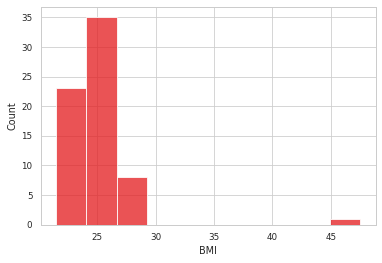

In [31]:
sns.histplot(weightLogInfo['BMI'],bins=10)


We can see that a a user is obese.

In [32]:
obese_user = weightLogInfo[weightLogInfo['BMI']>30]
obese_user

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport
2,1927972279,2016-04-13 01:08:52,133.5,294.31712,47.540001,False


User with Id: 	1927972279 is obesed

In [33]:
underweight_users = weightLogInfo[weightLogInfo['BMI']<18.5]
len(underweight_users)

0

None of the users are underweight

In [34]:
normal_weight_users = weightLogInfo[(weightLogInfo['BMI']>=18.5) & (weightLogInfo['BMI']<=24.9)]
len(normal_weight_users)

34

There are 34 users who weigh normally i.e they are healthy weight-wise.

In [35]:
overweight_users = weightLogInfo[(weightLogInfo['BMI']>=25.0) & (weightLogInfo['BMI']<=29.9)]
len(overweight_users)

32

There are 32 users who are overweight

# **ANALYSIS**

Analyzing the relationship between important features across tables

In [36]:
dailyActivity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [37]:
labels = ['Very Active Minutes','Fairly Active Minutes','Lightly Active Minutes','Sedentary Minutes']
vam = dailyActivity['VeryActiveMinutes'].sum()
fam = dailyActivity['FairlyActiveMinutes'].sum()
lam = dailyActivity['LightlyActiveMinutes'].sum()
sm = dailyActivity['SedentaryMinutes'].sum()
values = [vam, fam, lam, sm]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.show()

**Observations**
* The users spend over 80% of their time involved in Sedentary activities
* Only above 16% of their timme is spent on Lightly Active Activities.

Text(0, 0.5, 'Calories')

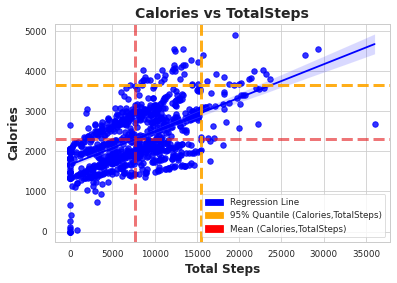

In [38]:
sns.regplot(data=dailyActivity, x='TotalSteps',y='Calories', color='b', marker='o', scatter_kws={'s':30})
plt.axhline(y=dailyActivity['Calories'].mean(), ls='--',lw=3,alpha=0.6)
plt.axvline(x=dailyActivity['TotalSteps'].mean(), ls='--',lw=3,alpha=0.6)
plt.axvline(x=dailyActivity['TotalSteps'].quantile(.95), ls='--',lw=3,alpha=0.9,color='orange')
plt.axhline(y=dailyActivity['Calories'].quantile(.95), ls='--',lw=3,alpha=0.9,color='orange')
orange = patch.Patch(color ='orange', label='95% Quantile (Calories,TotalSteps)')
blue = patch.Patch(color ='b', label='Regression Line')
red = patch.Patch(color ='r', label='Mean (Calories,TotalSteps)')
plt.legend(handles=[blue,orange,red])
plt.title('Calories vs TotalSteps', size=14,fontweight='bold')
plt.xlabel('Total Steps', size=12,fontweight='bold')
plt.ylabel('Calories', size=12,fontweight='bold')

**Observations**

* As the users take more steps, the burn more calories i.e there is a positive relationship between TotalSteps taken with the amount of calories burnt.

* Most of the users (around 95%) take less than 15000 steps daily.

* Also, about 95% of the users burn less than 4000 joules of calories daily

In [39]:
dailyActivity['SedentaryHours'] = dailyActivity['SedentaryMinutes']/60

Text(0, 0.5, 'SedentaryHours')

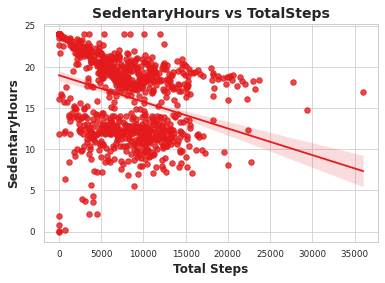

In [40]:
sns.regplot(data=dailyActivity, x='TotalSteps',y='SedentaryHours', marker='o', scatter_kws={'s':30})
plt.title('SedentaryHours vs TotalSteps', size=14,fontweight='bold')
plt.xlabel('Total Steps', size=12,fontweight='bold')
plt.ylabel('SedentaryHours', size=12,fontweight='bold')

**Observation**

* As expected, `SedentaryMinutes` decreases with respect to `TotalSteps` taken.

Text(0, 0.5, 'Calories')

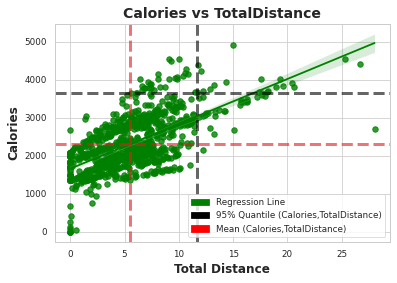

In [41]:
sns.regplot(data=dailyActivity, x='TotalDistance',y='Calories', color = 'g', marker='o', scatter_kws={'s':30})
plt.axhline(y=dailyActivity['Calories'].mean(), ls='--',lw=3,alpha=0.6)
plt.axvline(x=dailyActivity['TotalDistance'].mean(), ls='--',lw=3,alpha=0.6)
plt.axvline(x=dailyActivity['TotalDistance'].quantile(.95), ls='--',lw=3,alpha=0.6,color='black')
plt.axhline(y=dailyActivity['Calories'].quantile(.95), ls='--',lw=3,alpha=0.6,color='black')
black = patch.Patch(color ='black', label='95% Quantile (Calories,TotalDistance)')
green = patch.Patch(color ='g', label='Regression Line')
red = patch.Patch(color ='r', label='Mean (Calories,TotalDistance)')
plt.legend(handles=[green,black,red])
plt.title('Calories vs TotalDistance', size=14, fontweight='bold')
plt.xlabel('Total Distance', size=12,fontweight='bold')
plt.ylabel('Calories', size=12,fontweight='bold')

**Observations**

* As the users walk more steps, they burn more calories i.e there is a positive correlation between TotalDistance walked with the amount of calories burnt.

* Most of the users (around 95%) walk less than 12km daily.

* Also, about 95% of the users burn less than 4000 joules of calories daily

**Analyzing total time spent by users.**

**A new column will be created to sum up all the categories of time used by users as `totaltime`**

In [42]:
dailyActivity['TotalActiveMinutes'] = dailyActivity['FairlyActiveMinutes'] + dailyActivity['LightlyActiveMinutes'] + dailyActivity['VeryActiveMinutes']
dailyActivity['TotalActiveHours'] = round(dailyActivity['TotalActiveMinutes']/60,1)

In [43]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SedentaryHours,TotalActiveMinutes,TotalActiveHours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,12.133333,366,6.1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,12.933333,257,4.3
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,20.300000,222,3.7
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,12.100000,272,4.5
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,12.883333,267,4.4


Text(0.5, 1.0, 'SedentaryHours and TotalActiveHours Trend')

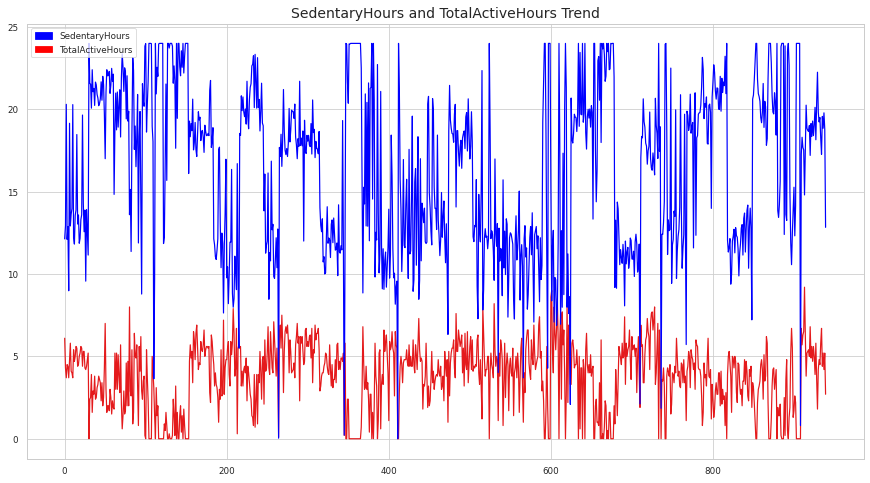

In [44]:
plt.figure(figsize=(15,8))
dailyActivity['TotalActiveHours'].plot(kind='line')
dailyActivity['SedentaryHours'].plot(kind='line', color='b')
blue = patch.Patch(color ='b', label='SedentaryHours')
red = patch.Patch(color ='r', label='TotalActiveHours')
plt.legend(handles=[blue,red])
plt.title('SedentaryHours and TotalActiveHours Trend', size=14)

**Observation**

* Overall, the users spend more time in sedentary position than they spend involved in active calories burning activities.

Text(0.5, 1.0, 'Calories vs TotalActiveHours')

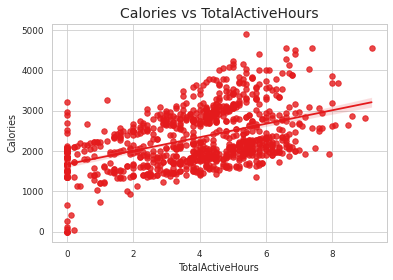

In [45]:
sns.regplot(data=dailyActivity,x='TotalActiveHours',y='Calories', marker='o', scatter_kws={'s':30})
plt.title('Calories vs TotalActiveHours', size=14)

**Observation**
* The more time spent in active activities, the more calories burnt.

Text(0, 0.5, 'TotalActiveHours')

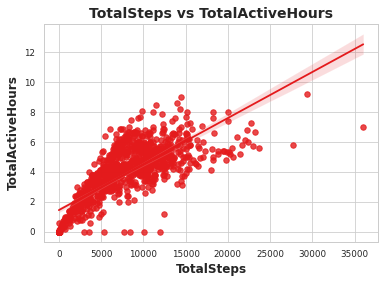

In [46]:
sns.regplot(data=dailyActivity,y='TotalActiveHours',x='TotalSteps', marker='o', scatter_kws={'s':30})
plt.title('TotalSteps vs TotalActiveHours', size=14, fontweight='bold')
plt.xlabel('TotalSteps', size=12,fontweight='bold')
plt.ylabel('TotalActiveHours', size=12,fontweight='bold')

**Observation**
* There is a positive correlation between TotalSteps taken and TotalActiveMinutes however, the users TotalSteps has more concetrations around 5000 - 13000 steps.
* The users TotalActiveMinutes clustered around 2 - 6 Hours.

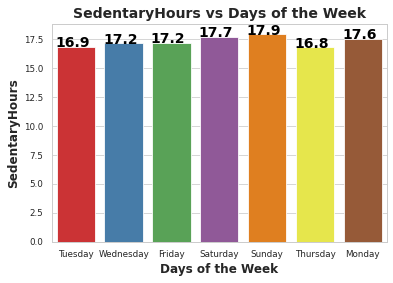

In [47]:
ax=sns.barplot(x=sleepDay['day_of_week'], y=dailyActivity['SedentaryHours'], ci=None)
plt.title('SedentaryHours vs Days of the Week', size=14,fontweight='bold')
plt.xlabel('Days of the Week', size=12,fontweight='bold')
plt.ylabel('SedentaryHours', size=12,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(),1)}', (p.get_x()+0.33, p.get_height()), ha='center', va='baseline', color='black', size=14,fontweight='bold')
plt.show()

**Observations**
* Users spend a lot of time involved in sedentary activities.This could be as a result of their profession or lifestyle as they are always in sedentary position throughout the week. There is no data to determine the reason behind the sedentary position all day.

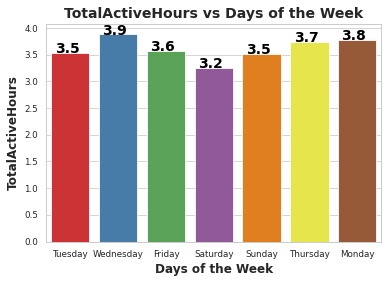

In [48]:
ax = sns.barplot(x=sleepDay['day_of_week'], y=dailyActivity['TotalActiveHours'],ci=None)
plt.title('TotalActiveHours vs Days of the Week', size=14,fontweight='bold')
plt.xlabel('Days of the Week', size=12,fontweight='bold')
plt.ylabel('TotalActiveHours', size=12,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height(),1)}', (p.get_x()+0.33, p.get_height()), ha='center', va='baseline', color='black', size=14,fontweight='bold')
plt.show()

**Observation**
* Strangely, the users indulge less on active calorie burning activities on Saturdays and Sundays.
* Wednesdays are the most preferred days for active calories burning activities.
*Mondays and Thursdays are also days with more Active Hours.


Text(0, 0.5, 'Calories')

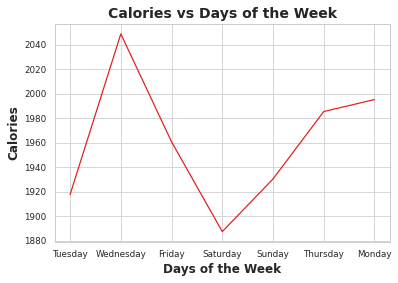

In [49]:
sns.lineplot(x=sleepDay['day_of_week'], y=dailyActivity['Calories'],ci=None)
plt.title('Calories vs Days of the Week', size=14,fontweight='bold')
plt.xlabel('Days of the Week', size=12,fontweight='bold')
plt.ylabel('Calories', size=12,fontweight='bold')

**Observation**
* Since the amount of calories burnt is directly correlated with the TotalActiveHours, Wednesdays, Mondays, and Thursdays are days with higher calories burnt.
*Saturdays and Sundays have the least calories burnt.

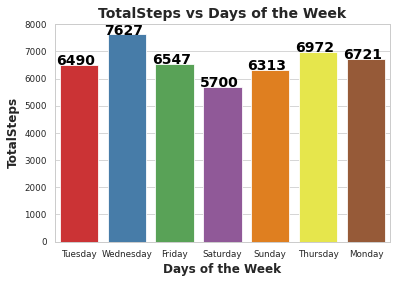

In [50]:
ax = sns.barplot(x=sleepDay['day_of_week'], y=dailyActivity['TotalSteps'],ci=None)
plt.title('TotalSteps vs Days of the Week', size=14,fontweight='bold')
plt.xlabel('Days of the Week', size=12,fontweight='bold')
plt.ylabel('TotalSteps', size=12,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height())}', (p.get_x()+0.33, p.get_height()), ha='center', va='baseline', color='black', size=14,fontweight='bold')
plt.show()

**Observations**
* Users walk more on Wednesday.
* Saturdays are mostly for resting and maximum sedentary activity.

In [51]:
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True


Text(0, 0.5, 'BMI')

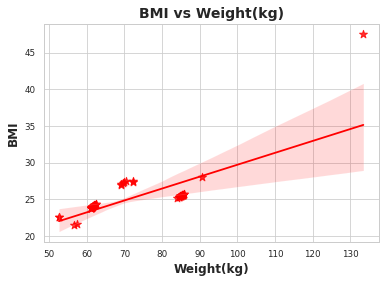

In [52]:
sns.regplot(data=weightLogInfo, x='WeightKg',y='BMI', marker='*', color='red', scatter_kws={'s':70})
plt.title('BMI vs Weight(kg)', size=14,fontweight='bold')
plt.xlabel('Weight(kg)', size=12,fontweight='bold')
plt.ylabel('BMI', size=12,fontweight='bold')

**Observation**

There is a positive relationship between Body Mass Index and Weight

---
# **DERIVED INSIGHTS FROM ANALYSIS**
---


**From the analysis of the datasets, the following insights were obtained:**

* The users spend over 80% of their time involved in Sedentary activities
* Only above 16% of their time is spent on Lightly Active Activities.
* As the users take more steps, the burn more calories i.e there is a positive relationship between TotalSteps taken with the amount of calories burnt.

* Most of the users (around 95%) take less than 15000 steps daily.

* About 95% of the users burn less than 4000 joules of calories daily.

* The data shows that 50% of the users have healthy weight while about 25% have unhealthy weight (possible obesed or overweight)

* SedentaryMinutes decreases with respect to TotalSteps taken.

* As the users walk more steps, they burn more calories i.e there is a positive correlation between TotalDistance walked with the amount of calories burnt.

* Most of the users (around 95%) walk less than 12km daily.

* The users spend more time in sedentary position than they spend involved in active calories burning activities.

* The more time spent in active activities, the more calories burnt.

* There is a positive correlation between TotalSteps taken and TotalActiveMinutes however, the users TotalSteps has more concentrations around 5000 - 13000 steps.

* The users TotalActiveMinutes clustered around 2 - 6 Hours.

* Users spend a lot of time involved in sedentary activities.This could be as a result of their profession or lifestyle as they are always in sedentary position throughout the week.

* The users indulge less on active calorie burning activities on Saturdays and Sundays.
* Wednesdays are the most preferred days for active calories burning activities.
* Mondays and Thursdays are also days with more Active Hours.
* Since the amount of calories burnt is directly correlated with the TotalActiveHours, Wednesdays, Mondays, and Thursdays are days with higher calories burnt.
* Saturdays and Sundays have the least calories burnt.
* Users walk more on Wednesday.
* Saturdays are mostly for resting and maximum sedentary activity.
*There is a positive relationship between Body Mass Index and Weight

---
# **RECOMMENDATIONS**
---
The following recommendation are made in line with using derived insights from the analysis of the datasets to answer the business questions;

**Business Questions;**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Applying Derived Insights to Business Questions**

**1. What are some trends in smart device usage?**
 * Highly noticeable trends are users spending more than 80% of their time in sedentary activities and 95% of the users walking less than 12km.
 * Users prefer wednesdays, mondays, and thursdays for active calorie burning activities while saturdays and sundays are mostly used for sedentary activities such as resting, sleeping, lying in bed, etc.'
 * Users total steps concentrate around 5,000 to 13,000 steps and their active hours lies within 2 - 6 hours.
 * There is a direct relationship between BMI and body Weight.
 * 50% of the users have healthy weight while about 25% have unhealthy weight (possible obesed or overweight)
 * Less than 4000 joules are burnt daily by the users.

**NB:** *More trends in the derived insights section*


**2. How could these trends apply to Bellabeat customers?**
 * These trends reflect the overall behaviour and device usage by the smart app device users. These trend can be applied to Bellabeat customers by using the insights derived from the analysis to influence their behaviour so as to increase engagement with the Bellabeat smart device in order to reap more health benefits from their engagement with the Bellabeat smart device.
 * These insights can help Bellabeat in planning and strategy development.

**3. How could these trends help influence Bellabeat marketing strategy?**

 * Bellabeat app can integrate the derived analysis in creating marketing strategies that centers around tracking user-centric features such as hours involved in sedentary and active activities.
    * The app can alert users to take partake in light to medium calorie burning activities when the time involved in sedentary activity is increasing beyond normal.
    * The app can send customize messages to remind users to partake in exercises during the weekends (Saturdays and Sundays)
    * Bellabeat app development team can design a reward game system into the app that automatically rewards users for burning more calories than their previous at time high calories burnt.
    * Bellabeat app should track users BMI and Weight and alert users on the benefit of maintaining a healthy weight.
    * Reminding users low steps users to increase their total steps during weekends in order to qualify for premium offers.


# **Slide Presentation**

Click the link below for the slide presentation.

[Presentation of Analysis](https://docs.google.com/presentation/d/1rQZGFz-xW_47v7HOlnw6AMnC6hr3G8zqUHxWwi-rGZQ/edit?usp=sharing)